# TheDataIncubator Challenge Q3: Project_Plot 2

## Title: Developing robust key performance indicators (KPI's) for the base utility power plant by employing machine learning on readily available data.

In this project ML approach is demonstrated to predict net power output ($PE$) of base utility combined cycle power plant (CCPP). The CCPP consist of gas turbine (GT), stream turbine (ST), and heat recovery steam generators (HRSG). This type of power plant is being installed in increasing numbers around the world where there is access to substantial quantities of natural gas [1].

Gas turbine power output primarily depends on the ambient parameters which are ambient temperature, atmospheric pressure, and relative humidity. Steam turbine power output has a direct relationship with vacuum at exhaust [2]. Building on that four parameters that are readily available in a CCPP are selected: ambient temperature ($AT$), ambient pressure ($AP$), relative humidity ($RH$), and exhaust vacuum ($V$).

Dataset used was contained 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. Data was collected by Pınar Tüfekci [2], and is available at: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant. 

[1] Ramireddy V. An overview of combined cycle power plant. <http://electricalengineering-portal.com/an-overview-of-combined-cycle-power-plant> [accessed: 02.03.13].

[2] Tüfekci P. Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, Electrical Power and Energy Systems, 60, 126–140, 2014. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel('CCPP_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


## Linear Regression for KPI's
Some insight into the correlation among parameters using Pearson correlation represented as a heat map.

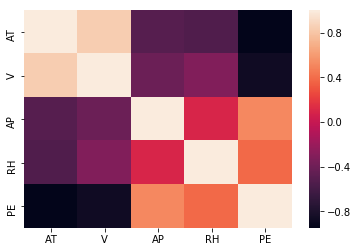

In [37]:
sns.heatmap(df.corr())
plt.show()

## Training a Linear Regression Model

We will need to first split up the dataframe into two data sets: 

* A training set
* A test test

We will train out model on the training set and then use the test set to evaluate the model.

Further, X contains the features $AT$, $V$, $AP$, $RH$ to train on, and y is the target variable $PE$.

In [9]:
X=df[["AT","V","AP","RH"]]
y=df[["PE"]]

## Train Test Split

40% of the data is kept here for testing.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

## Model Training

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction of $PE$ from the Model and Result Evaluations

Let's grab predictions off our test set and see how well it did!

Following are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

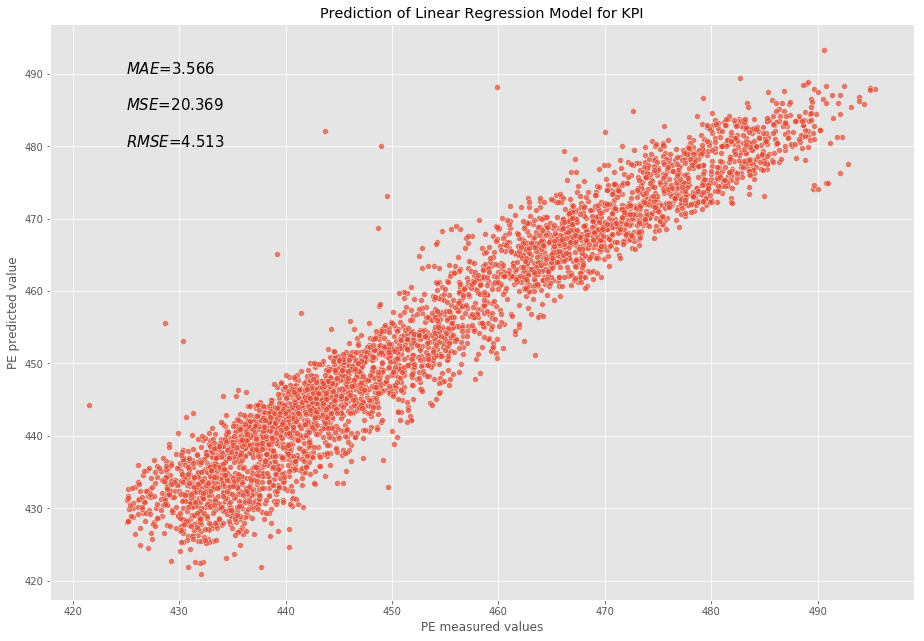

In [71]:
PE_pred = lm.predict(X_test)
plt.style.use('ggplot')

from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test, PE_pred)
MSE=metrics.mean_squared_error(y_test, PE_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, PE_pred))

MAE_str=('$MAE$={:.3f}'.format(MAE))
MSE_str=('$MSE$={:.3f}'.format(MSE))
RMSE_str=('$RMSE$={:.3f}'.format(RMSE))

#fig, axes = plt.subplots(figsize=(12,8))

fig=fig = plt.figure(figsize=(12,8))

axes = fig.add_axes([0,0,1,1])

axes.scatter(y_test.values,PE_pred, alpha=0.7, edgecolor='w')
axes.set_xlabel('PE measured values')
axes.set_ylabel('PE predicted value')
axes.set_title('Prediction of Linear Regression Model for KPI')
axes.text(425, 490, MAE_str, fontsize=15)
axes.text(425, 485, MSE_str, fontsize=15)
axes.text(425, 480, RMSE_str, fontsize=15)
plt.show()

### Insights from the plot:
* $MAE$, $MSE$, and $RMSE$ are **loss functions**, and lower values of these show a good prediction from the model.

## Conclusion
* The regression results shows that KPI's measure such as Power Outut ($PE$) of an CCPP can be predicted using readily avialble parameters.
* This approach can be extended to predict other KPI's for chemical and energy plants. 
